# BIBLIOTECAS

In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# DATASETS

In [2]:
features = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_train.data', 
                       na_filter=False, engine='python', sep='\t')

features.head(3)       

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1526,7,,,,...,oslk,fXVEsaq,jySVZNlOJy,,,xb3V,RAYp,F2FyR07IdsN7I,,
1,,,,,,525,0,,,,...,oslk,2Kb5FSF,LM8l689qOp,,,fKCe,RAYp,F2FyR07IdsN7I,,
2,,,,,,5236,7,,,,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,


In [3]:
outcome = pd.read_csv(r'/Users/daianeklein/Documents/Cursos/cursos-bootcamps/Udemy/Churn-Clientes/kdd/orange_small_train_churn.labels',
                     header=None)

outcome.head(3)

,0
0,-1
1,1
2,-1


## IDENTIFICANDO VARIAVEIS NUMERICAS E CATEGORICAS

In [4]:
#todas as variaveis
all_vars = np.array(features.columns)

#Variaveis numericas
num_vars = np.array(all_vars[:190])

#Variaveis categoricas
cat_vars = np.array(all_vars[190:])

## TIPO DE DADOS

In [5]:
#Tipo de dados
features.dtypes

Var1      object
Var2      object
Var3      object
Var4      object
Var5      object
           ...  
Var226    object
Var227    object
Var228    object
Var229    object
Var230    object
Length: 230, dtype: object

In [6]:
# Verificando a quantidade de 
var = features.groupby('Var1').size()
var 

Var1
       49298
0        380
120        1
128        2
152        1
16        81
24        46
32        23
360        1
392        1
40        10
48         6
536        1
56         5
64         1
680        1
72         3
8        138
80         1
dtype: int64

In [7]:
# Agrupando as variaveis numericas 
counts_per_column = pd.DataFrame()

for col in num_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)

In [8]:
# Visualizando
counts_per_column.T.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
,49298.0,48759.0,48760.0,48421.0,48513.0,5529.0,5539.0,50000.0,49298.0,48513.0,...,5009.0,48421.0,48759.0,48759.0,50000.0,49298.0,49298.0,48759.0,28978.0,49667.0
0,380.0,1240.0,996.0,1561.0,898.0,976.0,13090.0,NaN,144.0,902.0,...,41990.0,706.0,830.0,771.0,NaN,525.0,240.0,44.0,NaN,4.0
120,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN
128,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias Index(['', '-10', '-1000060.0', '-10002.16', '-100034.8', '-1000420.0',
       '-1000468.0', '-1000496.0', '-1000516.0', '-1000548.0'],
      dtype='object')
Ultimas dez categorias Index(['9999040', '999920', '9999240', '99993', '9999400', '9999440',
       '9999480', '99995', '99996', '999971'],
      dtype='object')


In [10]:
# Verificando as variaveis categoricas

# Agrupando
counts_per_column = pd.DataFrame()

for col in cat_vars:
    col_count = features.groupby(col).size()
    counts_per_column = counts_per_column.append(col_count, ignore_index=True)
    
# Verificando se as variaveis numericas estao corretas (se são somente numericas mesmo)
counts_per_column = counts_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace = True)

print('Primeiras dez categorias', counts_per_column.index[:10])
print('Ultimas dez categorias', counts_per_column.index[(len(counts_per_column.index)-10):])

Primeiras dez categorias Index(['', '000J', '0062', '00AD', '00ARusu', '00AYONy', '00AhP4J', '00J8E9a',
       '00JHTSP', '00L3'],
      dtype='object')
Ultimas dez categorias Index(['zzQ9udm', 'zzQV', 'zzbGOGx', 'zzbGa54', 'zzcv6yg4s3UGv', 'zzfHvGh',
       'zzfLM_S', 'zzfUfAI', 'zzfo6HG', 'zzpZ'],
      dtype='object')


In [11]:
# Substituindo os valores nulos por NaN
features = features.replace('', np.nan)

features.head(3)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525,0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236,7,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN


In [12]:
# Alterando o tipo de dados
for col in num_vars:
    features[col] = features[col].astype('float')

for col in cat_vars:
    features[col] = features[col].astype('object')
    
features.dtypes

Var1      float64
Var2      float64
Var3      float64
Var4      float64
Var5      float64
           ...   
Var226     object
Var227     object
Var228     object
Var229     object
Var230     object
Length: 230, dtype: object

# SELEÇÃO DE VARIÁVEIS

In [13]:
#Verificando as variaveis com valores faltantes
features.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
3,True,True,True,True,True,True,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
49996,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
49997,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,True,True
49998,True,True,True,False,True,True,True,True,True,True,...,False,False,False,True,True,False,False,False,True,True


In [14]:
# Verificando quantos dados em branco há em cada coluna
empty_entries_per_columns = features.isna().sum(axis = 0)
empty_entries_per_columns

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

48513.0


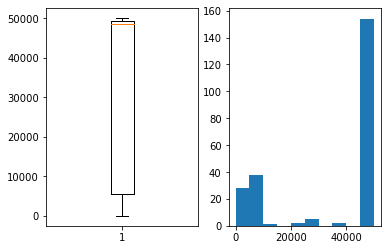

In [15]:
# Plotando os dados para verificar a quantidade de dados faltantes
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(empty_entries_per_columns)
ax2.hist(empty_entries_per_columns)
median = empty_entries_per_columns.median()

print(median)

In [16]:
# mantendo as variaveis que possuem, pelo menos, 75% de valores preenchidos
num_entries = len(features)
threshold = 0.25
num_entries * threshold

12500.0

In [17]:
# Variaveis que serão mantidas
keep_vars = np.array(features.columns[(empty_entries_per_columns <= (num_entries * threshold))])
keep_vars

array(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25',
       'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149',
       'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var192',
       'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [18]:
# Selecionando somente as variaveis dentro da regra acima
num_vars = [elem for elem in num_vars if elem in keep_vars]
cat_vars = [elem for elem in cat_vars if elem in keep_vars]

print(len(num_vars))
print(len(cat_vars))

38
28


In [19]:
# preenchendo os NaN pela média
for col in num_vars:
    col_mean = features[col].mean()
    features[col] = features[col].fillna(col_mean)
    
# preenchendo os NaN por 'missig'
for col in cat_vars:
    features[col] = features[col].fillna('missing')

In [20]:
# Verificando quantas diferentes categorias existe em cada variavel (coluna)
n_categories_per_feature = features[cat_vars].apply(lambda x: len(set(x)))
n_categories_per_feature

Var192      362
Var193       51
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var226       23
Var227        7
Var228       30
dtype: int64

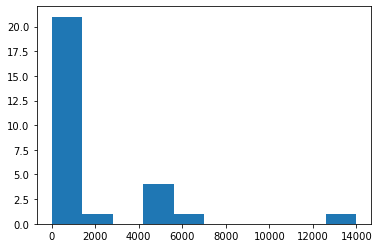

In [21]:
# visualizando a qt. de categorias
plt.hist(n_categories_per_feature);

In [22]:
# Filtrando somente as variaveis que possuem até 1.400 registros únicos
cat_vars = np.array(n_categories_per_feature[n_categories_per_feature < 1400].index)
cat_vars

array(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210',
       'Var211', 'Var212', 'Var218', 'Var219', 'Var221', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [23]:
# concatenando as duas variaveis (numericas e categoricas)
features = features[list(num_vars) + list(cat_vars)]
features

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,1526.000000,7.000000,184.000000,464.000000,580.000000,14.000000,128.00000,166.560000,0.00000,3.570000e+03,...,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000000,0.000000,0.000000,168.000000,210.000000,2.000000,24.00000,353.520000,0.00000,4.764966e+06,...,uKAI,L84s,NhsEn4L,missing,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.000000,7.000000,904.000000,1212.000000,1515.000000,26.000000,816.00000,220.080000,0.00000,5.883894e+06,...,uKAI,L84s,UbxQ8lZ,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,1326.437116,0.000000,0.000000,234.518225,0.000000,4.507926,0.00000,22.080000,0.00000,0.000000e+00,...,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.000000,7.000000,3216.000000,64.000000,80.000000,4.000000,64.00000,200.000000,0.00000,0.000000e+00,...,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.000000,0.000000,0.000000,132.000000,165.000000,2.000000,0.00000,288.080000,0.00000,6.042420e+06,...,uKAI,L84s,NhsEn4L,cJvF,FzaX,oslk,LM8l689qOp,7FJQ,RAYp,F2FyR07IdsN7I
49996,1078.000000,0.000000,2736.000000,380.000000,475.000000,2.000000,88.00000,166.560000,0.00000,0.000000e+00,...,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,55YFVY9
49997,2807.000000,7.000000,1460.000000,568.000000,710.000000,4.000000,328.00000,166.560000,0.00000,4.221000e+04,...,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_
49998,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.82701,224.507669,0.71681,2.579107e+06,...,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


# SELEÇÃO DAS VARIÁVEIS

***

## ÁRVORE DE DECISÃO

In [24]:
# variaveis dummies (transformando as variaveis categoricas)
features_c = pd.get_dummies(features)
features_c.shape

(50000, 1040)

In [25]:
features_c.head(6)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,0,0,0,0,0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,0,0,0,0,0,1,0,0,0,0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,658.000000,7.0,3156.0,224.000000,280.0,2.000000,72.0,200.00,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Criando uma funcao para calcular a importancia de cada variavel
def etc_importances(features, outcome):
    model = ExtraTreesClassifier(n_estimators=200, criterion='entropy', verbose=0)
    model.fit(features, np.array(outcome).ravel())
    
    importances = model.feature_importances_
    variables = np.array(features.columns)
    indices = np.argsort(importances)[::-1]
    importances = importances[indices]
    variables =variables[indices]
    
    return variables, importances

variables, importances = etc_importances(features_c, outcome)

In [27]:
#Verificando a qt. ideal de atributos
def sum_and_plot_importances(variables, importances):
    sum_importances = pd.DataFrame()
    for i in range(importances.size):
        sum_importance = importances[:(i+1)].sum()
        this_variable = pd.Series([variables[i], sum_importance])
        sum_importances = sum_importances.append(this_variable, ignore_index= True)
    plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
    return sum_importances

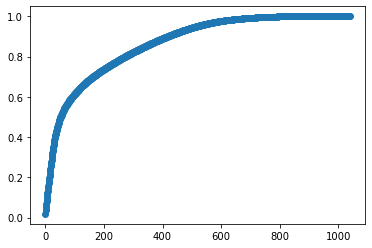

In [28]:
sum_importances = sum_and_plot_importances(variables, importances)

In [29]:
def keep_vars(features, sum_importances, threshold):
    keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
    features = features.loc[:, keep_vars]
    
    return features

In [30]:
features_c = keep_vars(features_c, sum_importances, threshold = 0.99)

In [31]:
features_c.shape

(50000, 684)

# SEPARANDO OS DADOS DE TREINO E TESTE

In [34]:
def split_datasets(features, outcome, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size = test_size,
                                                       stratify = outcome, random_state = 0)
    y_train, t_test = np.array(y_train).ravel(), np.array(y_test).ravel()
    
    return X_train, X_test, y_train, t_test

In [36]:
X_train, X_test, y_train, y_test = split_datasets(features_c, outcome)

In [38]:
X_train.shape

(40000, 684)

In [39]:
X_test.shape

(10000, 684)

# RANDOM FOREST CLASSIFIER

In [40]:
def rfc_test(X_train, y_train, n_estimators = 100, cv = 5):
    np.random.seed(0)
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs= -1)
    cv_scores = cross_val_score(rfc, X_train, y_train, scoring= 'roc_auc', cv = cv, n_jobs= -1)
    print('Média dos cinco testes: ', cv_scores.mean())

In [41]:
rfc_test(X_train, y_train)

Média dos cinco testes:  0.6322581787098208


# GRADIENT BOOSTING CLASSIFIER

In [45]:
def gbc_test(X_train, y_train, n_estimators = 100, learning_rate = 0.1, cv = 5):
    np.random.seed(0)
    gbc = GradientBoostingClassifier(n_estimators= n_estimators, learning_rate= learning_rate,
                                    random_state= 0)
    cv_scores = cross_val_score(gbc, X_train, y_train, scoring= 'roc_auc', cv = cv, n_jobs= -1)
    print('Média dos cincos Testes: ', cv_scores.mean())

In [46]:
gbc_test(X_train, y_train)

Média dos cincos Testes:  0.671041559059564


## OTIMIZANDO O GBC

In [88]:
#learning rate
def optimize(n_estimators, learning_rate, min_samples_split, min_samples_leaf,
             max_depth, max_features, subsample, params, cv = 5):
    np.random.seed(0)
    gbc = GradientBoostingClassifier(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  subsample = subsample,
                                  random_state = 0)
    grid_search = GridSearchCV(estimator = gbc, param_grid = params, scoring = 'roc_auc',
                             n_jobs = -1, iid = False, cv = cv)
    grid_search.fit(X_train, y_train)
    results = grid_search.cv_results_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(best_params, best_score)
  
    return gbc, best_params, best_score

In [89]:
# variaveis para armazenar os resultados
models = np.array([])
opt_params = dict()
scores = np.array([])

In [90]:
# modelo 0
learning_rate = 0.1
n_estimators = None
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'n_estimators': range(50, 151, 10)}

In [91]:
gbc, opt_param, score = optimize(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

/Users/daianeklein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'n_estimators': 60} 0.6696389069489724


In [96]:
# Atualizando as variaveis com os resultados
models = np.append(models, gbc)
opt_params = {**opt_params, **opt_param}
scores = np.append(scores, score)

In [97]:
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=20, min_samples_split=250,
                           n_estimators=None, random_state=0, subsample=0.8),
       GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=20, min_samples_split=250,
                           n_estimators=None, random_state=0, subsample=0.8)],
      dtype=object)

In [98]:
opt_params

{'n_estimators': 60}

In [99]:
scores

array([0.66963891])